In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\hp5cd\Documents\Assignments\MBA Salary.csv")
df = pd.DataFrame(data)
df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [5]:
df.describe()

,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


In [6]:
df.isnull().sum()

S. No.                    0
Percentage in Grade 10    0
Salary                    0
dtype: int64

In [7]:
df.drop(inplace=True, columns=['S. No.'])

<Axes: xlabel='Percentage in Grade 10', ylabel='Count'>

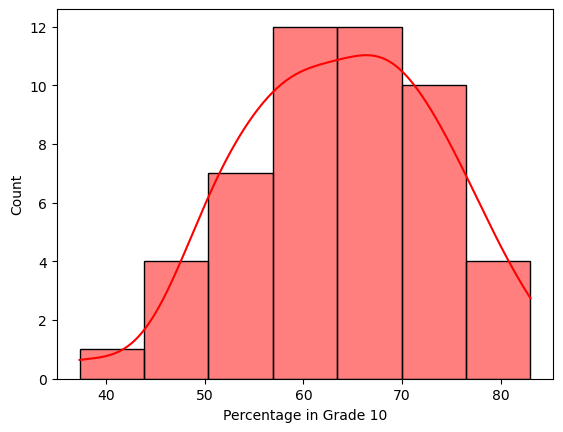

In [8]:
sns.histplot(df['Percentage in Grade 10'], kde=True, color='red')

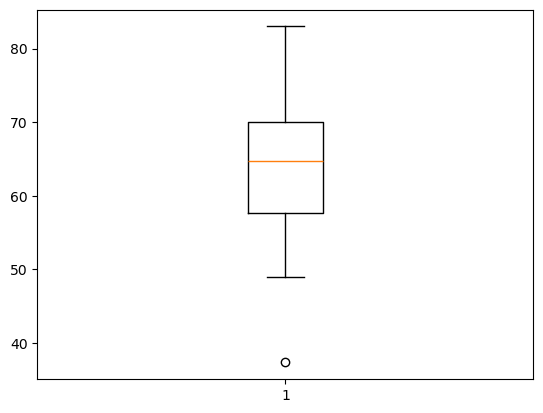

In [9]:
plt.boxplot(df['Percentage in Grade 10'])
plt.show()

In [10]:
Q1 = df['Percentage in Grade 10'].quantile(0.25)
Q2 = df['Percentage in Grade 10'].quantile(0.75)
IQR = Q2 - Q1
lower = Q1-1.5*IQR
upper = Q2+1.5*IQR
df['Percentage in Grade 10'] = np.where(df['Percentage in Grade 10']<lower, lower, np.where(df['Percentage in Grade 10']>upper, upper, df['Percentage in Grade 10']))

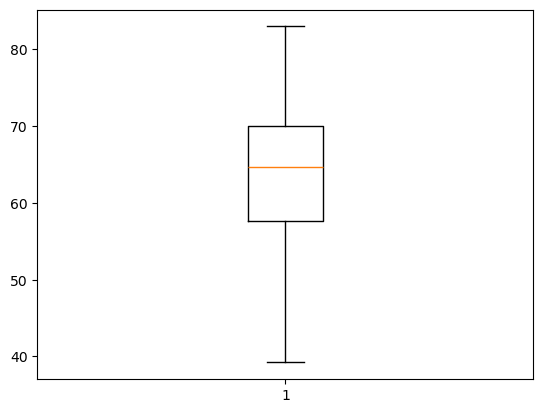

In [11]:
plt.boxplot(df['Percentage in Grade 10'])
plt.show()

In [12]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train : {X_train.shape}")
print(f"Test : {X_test.shape}")

Train : (35, 1)
Test : (15, 1)


In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
pd.DataFrame({
    'Acutal' : y_test,
    'Predicted' : y_pred
})

,Acutal,Predicted
13,450000,282073.061770
39,200000,233368.530572
30,250000,269504.150493
45,180000,242135.346187
17,280000,259134.798689
48,240000,255364.125306
26,180000,230226.302752
25,250000,253164.565833
32,300000,238081.872300
19,224000,244366.327939


In [52]:
print(f"Accuracy : {r2_score(y_test, y_pred)}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE : {mean_squared_error(y_test, y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}")

Accuracy : 0.17974524381535828
MAE : 56327.94902443229
MSE : 6393925925.802918
RMSE : 79962.028024575


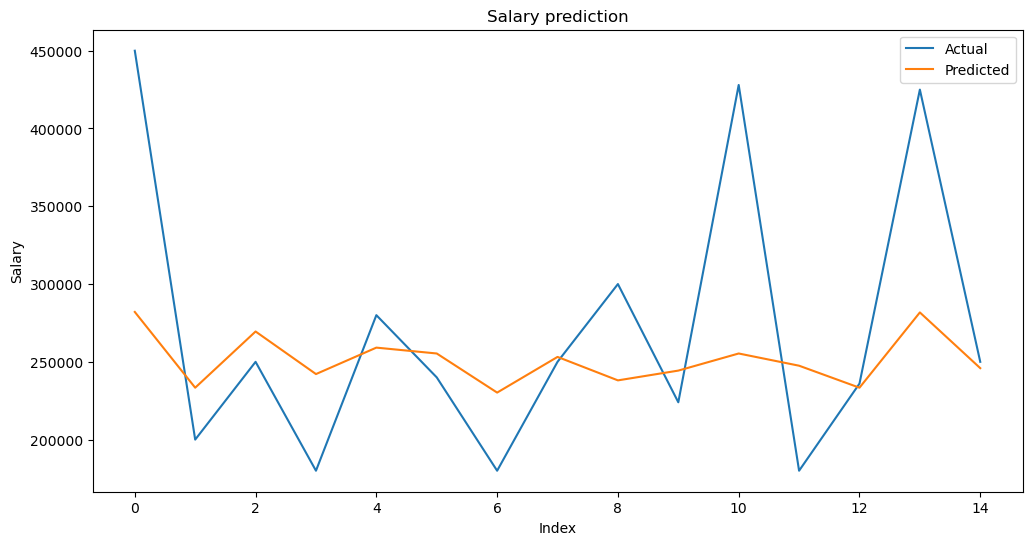

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Salary prediction')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.legend()
plt.show()

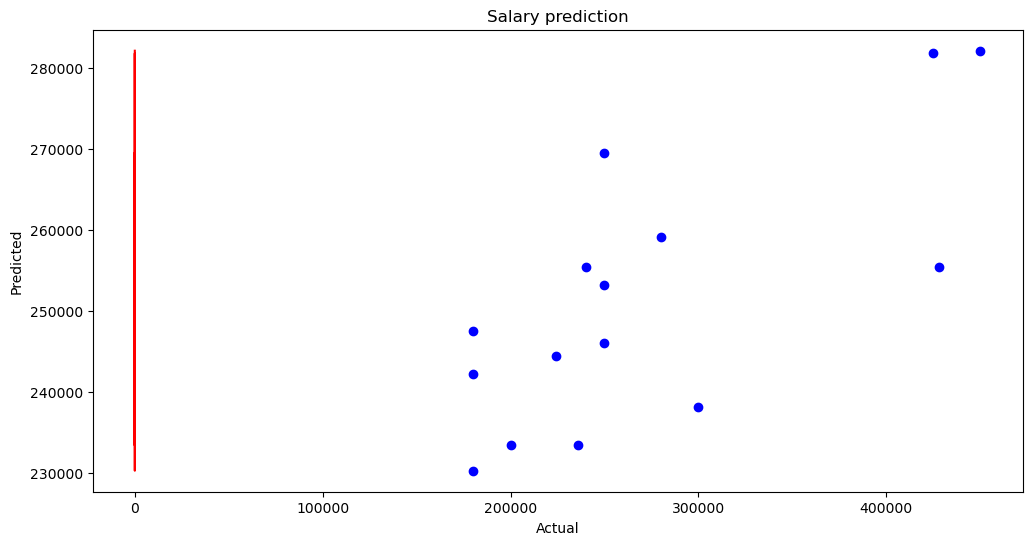

In [54]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, c='blue')
plt.plot(y_pred, c='red')
plt.title('Salary prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()